<a href="https://colab.research.google.com/github/anjuunni/Sample/blob/main/life_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycountry_convert

     |████████████████████████████████| 10.1MB 3.7MB/s 
     |████████████████████████████████| 245kB 41.3MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=d551a1b351dd1863d10637ea7a50bcfba98810db923b5459f3a684e2321cc7fc
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
ERROR: pytest-cov 2.12.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-mock 3.6.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

In [ ]:
import seaborn as sns

In [ ]:
import plotly.express as px
from scipy import stats
from pycountry_convert import country_alpha2_to_continent_code,country_name_to_country_alpha2
import warnings


In [ ]:
life_exp=pd.read_csv('Life Expectancy Data.csv')

In [ ]:
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
life_exp.shape

(2938, 22)

In [ ]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
life_exp.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
country_vs_life = life_exp.groupby('Country', as_index=False)['Life expectancy '].mean()

In [ ]:
country_vs_life.sort_values(by='Life expectancy ',ascending=False).head(10)

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [ ]:
country_vs_life.sort_values(by='Life expectancy ').head(10)

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



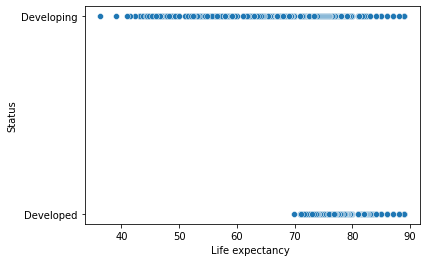

In [ ]:
sns.scatterplot('Life expectancy ','Status',data=life_exp);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



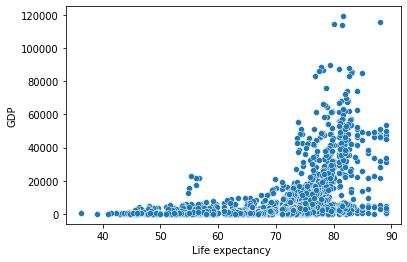

In [ ]:
sns.scatterplot('Life expectancy ','GDP',data=life_exp);

In [ ]:
pair_data=life_exp[life_exp.columns['Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measels','BMI','Under-five deaths','Polio','Total expenditure','Diphtheria',' HIV/AIDS','GDP','Population','income composition of resources','schooling']]

IndexError: ignored

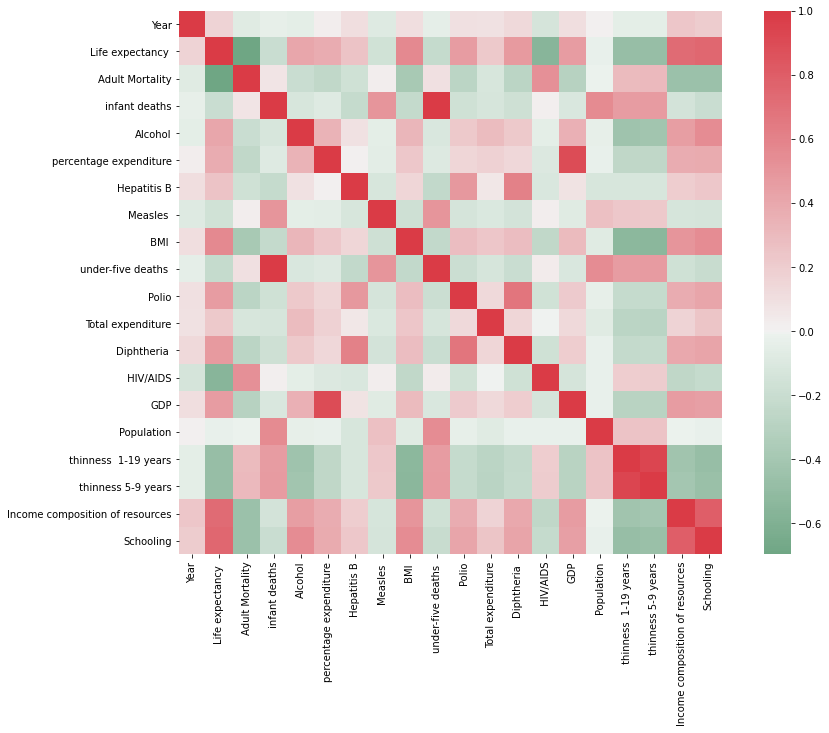

In [ ]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(life_exp.corr(),cmap=cmap,center=0,annot=False,square=True);


In [ ]:
continents={
    'NA':'North America',
    'SA':'South America',
    'AS':'Asia',
    'AUS':'Australia',
    'AF':'Africa',
    'EU':'Europe'
}
continent=[]
for country in life_exp['Country']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except:
        continent.append('Africa')    

In [ ]:
life_exp['Continents']=continent
to_bubble=life_exp.loc[:,['Country','Year','Life expectancy ','GDP','Population','Continents']]
to_bubble.dropna(inplace=True)

In [ ]:

fig=px.scatter(to_bubble,x='GDP',y='Life expectancy ',size='Population',color='Continents',hover_name='Country',size_max=50)
fig.show()

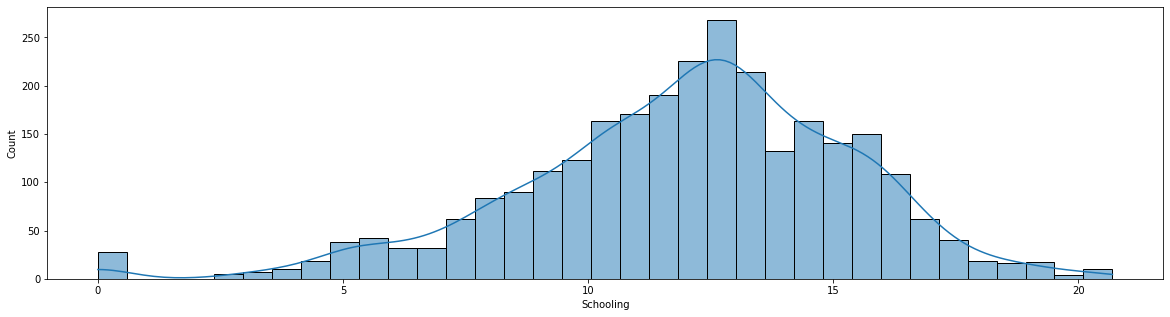

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(life_exp['Schooling'].dropna(),kde=True)

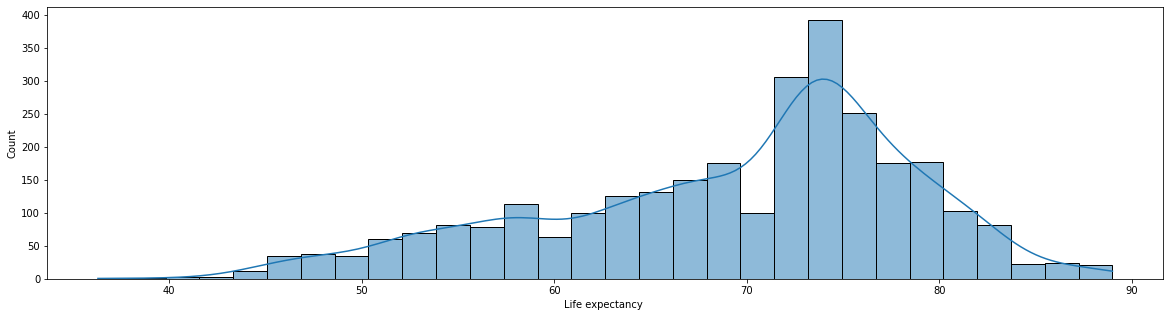

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(life_exp['Life expectancy '].dropna(),kde=True);

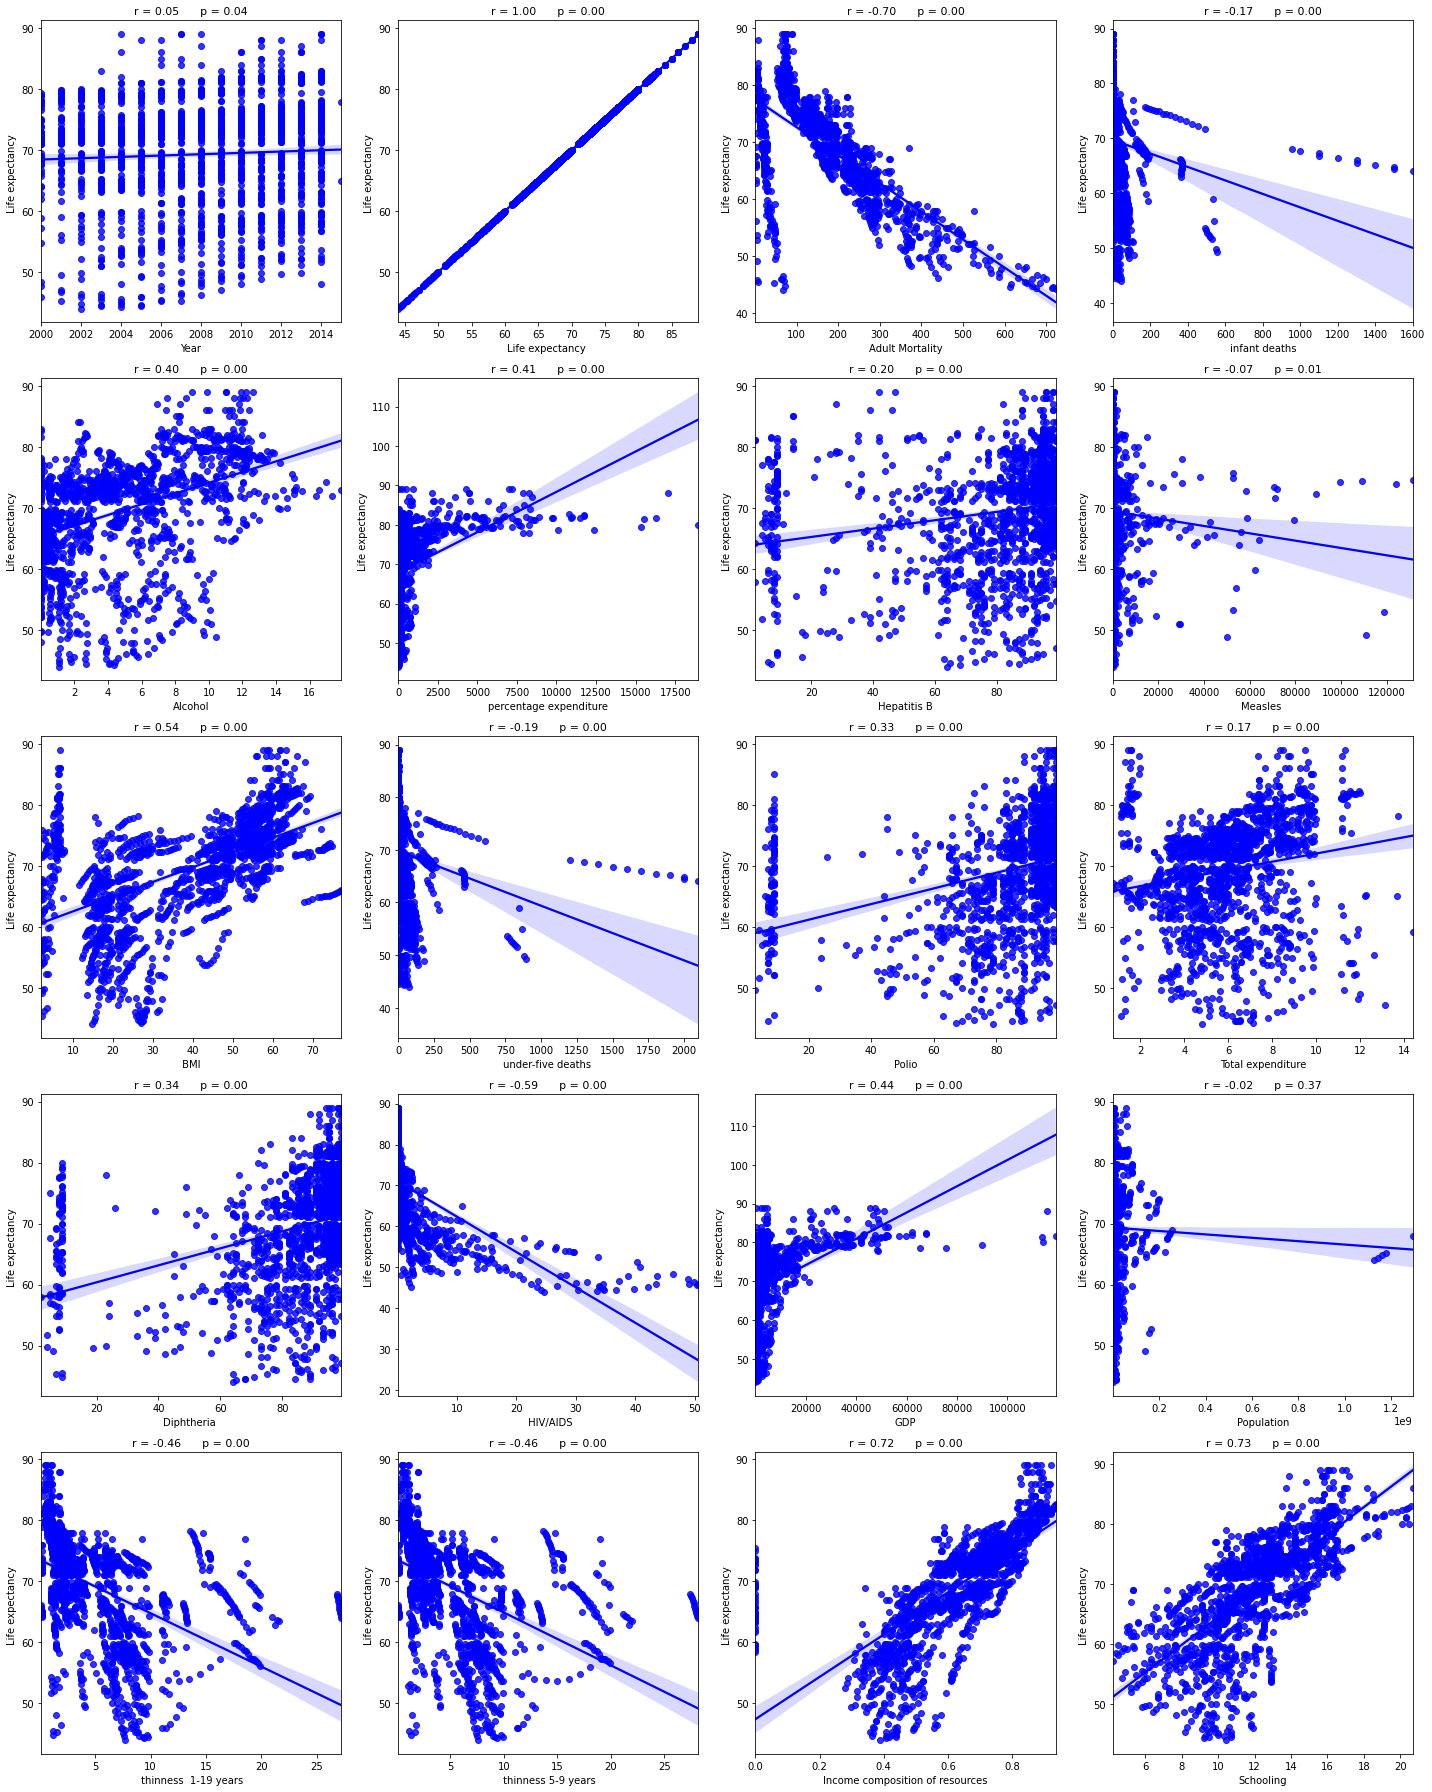

In [ ]:
nr_rows=5
nr_cols=4
fig,axs=plt.subplots(nr_rows,nr_cols,figsize=(nr_cols*5,nr_rows*5))
numerical_vals=life_exp.dtypes[life_exp.dtypes!='object'].index
#li_num_vals_plot=[c for c in list(numerical_vals)]
life_exp.dropna(inplace=True)
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i=r*nr_cols+c
        if i<len(numerical_vals):
            sns.regplot(x=life_exp[numerical_vals[i]],y=life_exp['Life expectancy '],color='blue',ax=axs[r][c])
            stp=stats.pearsonr(life_exp[numerical_vals[i]],life_exp['Life expectancy '])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
plt.tight_layout()    
sns.set(color_codes=True)            
plt.show()            

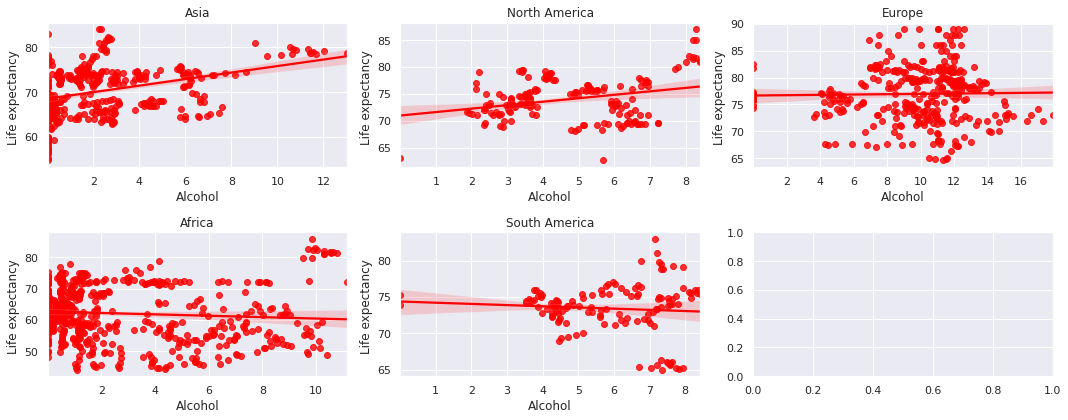

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5)
for conts, ax in zip(set(life_exp["Continents"]), axs.flat):
    Conts = life_exp[life_exp['Continents'] == conts]
    sns.regplot(x = Conts['Alcohol'],y = Conts["Life expectancy "], color = 'red', ax = ax).set_title(conts)
plt.tight_layout()    
sns.set(color_codes=True)
plt.show()    

In [ ]:
target = life_exp["Life expectancy "]
features = life_exp[life_exp.columns.difference(['Life expectancy '])]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 200, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 134}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
base_model = RandomForestRegressor()   # n_estimators = 10
base_model.fit( X_test, Y_test)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,  X_test, Y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.5500 degrees.
Accuracy = 99.16%.
Model Performance
Average Error: 1.1133 degrees.
Accuracy = 98.32%.
Improvement of -0.84%.


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 50, None],
    'max_features': [2, 3, 4, 'auto'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [1, 2, 4, 8],
    'n_estimators': [10, 30, 100, 120, 150]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 635 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1532 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2218 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 3022 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4006 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 5021 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 19.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Model Performance
Average Error: 1.1027 degrees.
Accuracy = 98.33%.
Improvement of -0.83%.


In [ ]:
model_predictions = best_grid.predict(X_test)
residuals = model_predictions - Y_test

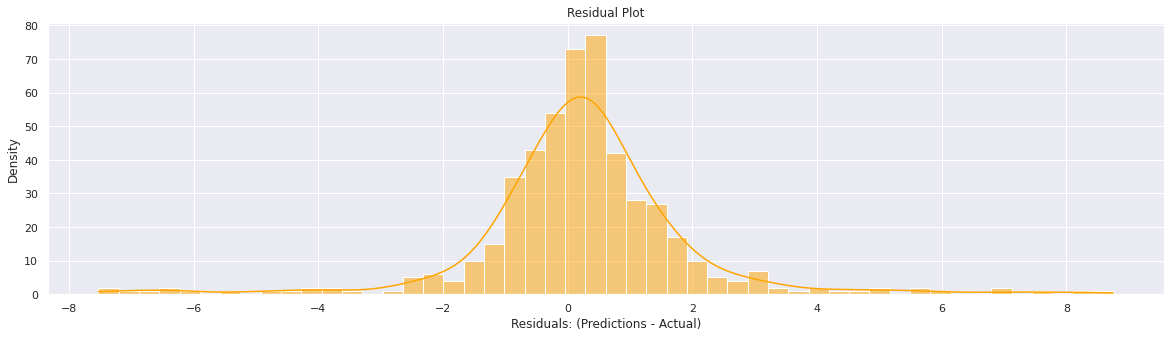

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(residuals, kde=True, color="orange")
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

In [ ]:
from sklearn.metrics import r2_score
print("R-squared Score Obtained for predicting Life Expectancy is {0}".format(r2_score(Y_test, model_predictions)))

R-squared Score Obtained for predicting Life Expectancy is 0.9569286027950441
